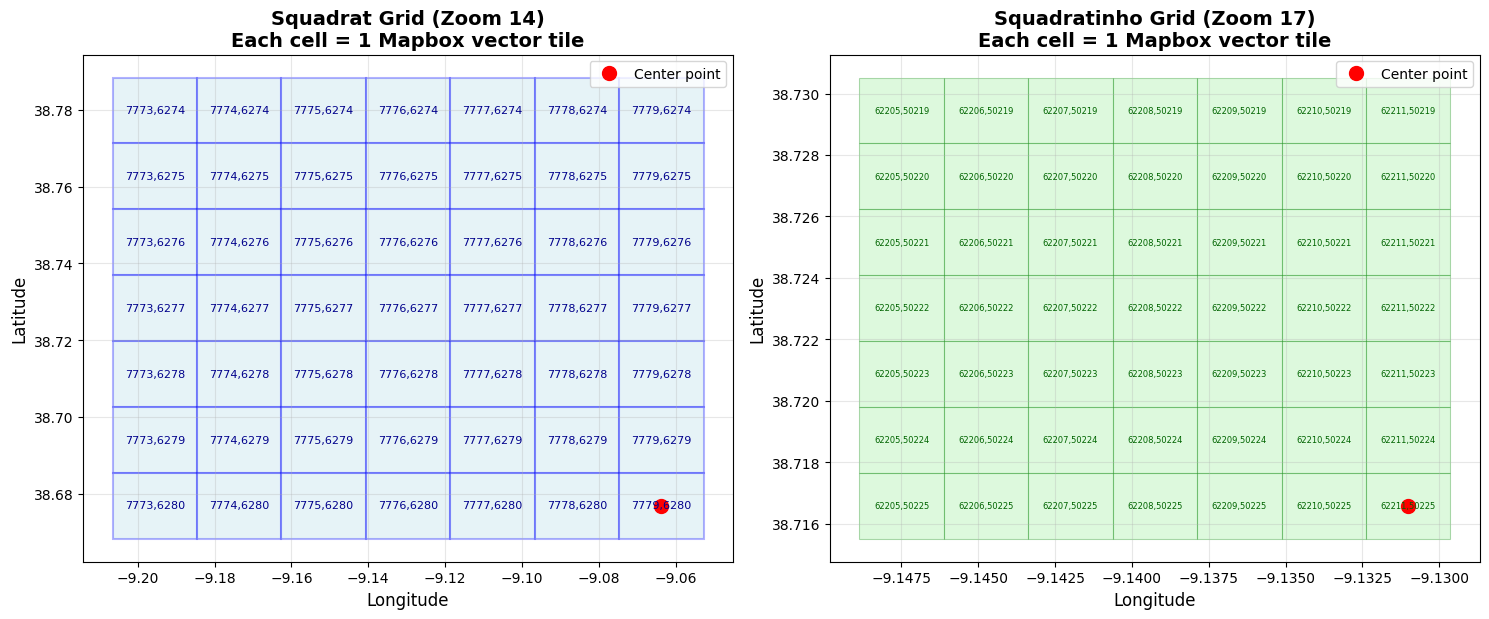


Squadrat Grid (Zoom 14):
  Total tiles: 49
  Tile size: ~0.021973° lon x 0.017129° lat

Squadratinho Grid (Zoom 17):
  Total tiles: 49
  Tile size: ~0.002747° lon x 0.002143° lat


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def latlon_to_tile(lat, lon, zoom):
    """Convert lat/lon to tile coordinates at given zoom level"""
    lat_rad = np.radians(lat)
    n = 2.0 ** zoom
    xtile = int((lon + 180.0) / 360.0 * n)
    ytile = int((1.0 - np.arcsinh(np.tan(lat_rad)) / np.pi) / 2.0 * n)
    return xtile, ytile

def tile_to_latlon(x, y, zoom):
    """Convert tile coordinates to lat/lon (northwest corner)"""
    n = 2.0 ** zoom
    lon = x / n * 360.0 - 180.0
    lat_rad = np.arctan(np.sinh(np.pi * (1 - 2 * y / n)))
    lat = np.degrees(lat_rad)
    return lat, lon

def get_tile_bounds(x, y, zoom):
    """Get the lat/lon bounds of a tile"""
    lat_nw, lon_nw = tile_to_latlon(x, y, zoom)
    lat_se, lon_se = tile_to_latlon(x + 1, y + 1, zoom)
    return lon_nw, lon_se, lat_se, lat_nw  # west, east, south, north

def create_mapbox_grids(center_lat, center_lon, zoom_squadrat=14, zoom_squadratinho=17, 
                        tiles_radius=3, figsize=(15, 15)):
    """
    Create squadrat (zoom 14) and squadratinho (zoom 17) grids
    
    Parameters:
    - center_lat, center_lon: Center point of the map
    - zoom_squadrat: Zoom level for squadrat grid (default 14)
    - zoom_squadratinho: Zoom level for squadratinho grid (default 17)
    - tiles_radius: Number of tiles to show in each direction from center
    - figsize: Figure size for matplotlib
    """
    
    # Get center tile coordinates
    center_x_sq, center_y_sq = latlon_to_tile(center_lat, center_lon, zoom_squadrat)
    center_x_sqinho, center_y_sqinho = latlon_to_tile(center_lat, center_lon, zoom_squadratinho)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # --- SQUADRAT GRID (Zoom 14) ---
    ax1.set_title(f'Squadrat Grid (Zoom {zoom_squadrat})\nEach cell = 1 Mapbox vector tile', 
                  fontsize=14, fontweight='bold')
    
    squadrat_tiles = []
    for dx in range(-tiles_radius, tiles_radius + 1):
        for dy in range(-tiles_radius, tiles_radius + 1):
            x = center_x_sq + dx
            y = center_y_sq + dy
            
            west, east, south, north = get_tile_bounds(x, y, zoom_squadrat)
            
            # Create rectangle
            rect = patches.Rectangle((west, south), east - west, north - south,
                                     linewidth=1.5, edgecolor='blue', 
                                     facecolor='lightblue', alpha=0.3)
            ax1.add_patch(rect)
            
            # Add tile coordinates label
            center_lon = (west + east) / 2
            center_lat = (south + north) / 2
            ax1.text(center_lon, center_lat, f'{x},{y}', 
                    ha='center', va='center', fontsize=8, color='darkblue')
            
            squadrat_tiles.append((x, y, west, east, south, north))
    
    # Add center point marker
    ax1.plot(center_lon, center_lat, 'ro', markersize=10, label='Center point')
    ax1.set_xlabel('Longitude', fontsize=12)
    ax1.set_ylabel('Latitude', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_aspect('equal', adjustable='box')
    
    # --- SQUADRATINHO GRID (Zoom 17) ---
    ax2.set_title(f'Squadratinho Grid (Zoom {zoom_squadratinho})\nEach cell = 1 Mapbox vector tile', 
                  fontsize=14, fontweight='bold')
    
    squadratinho_tiles = []
    for dx in range(-tiles_radius, tiles_radius + 1):
        for dy in range(-tiles_radius, tiles_radius + 1):
            x = center_x_sqinho + dx
            y = center_y_sqinho + dy
            
            west, east, south, north = get_tile_bounds(x, y, zoom_squadratinho)
            
            # Create rectangle
            rect = patches.Rectangle((west, south), east - west, north - south,
                                     linewidth=0.8, edgecolor='green', 
                                     facecolor='lightgreen', alpha=0.3)
            ax2.add_patch(rect)
            
            # Add tile coordinates label (smaller font for denser grid)
            center_lon = (west + east) / 2
            center_lat = (south + north) / 2
            ax2.text(center_lon, center_lat, f'{x},{y}', 
                    ha='center', va='center', fontsize=6, color='darkgreen')
            
            squadratinho_tiles.append((x, y, west, east, south, north))
    
    # Add center point marker
    ax2.plot(center_lon, center_lat, 'ro', markersize=10, label='Center point')
    ax2.set_xlabel('Longitude', fontsize=12)
    ax2.set_ylabel('Latitude', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_aspect('equal', adjustable='box')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSquadrat Grid (Zoom {zoom_squadrat}):")
    print(f"  Total tiles: {len(squadrat_tiles)}")
    print(f"  Tile size: ~{abs(squadrat_tiles[0][3] - squadrat_tiles[0][2]):.6f}° lon x {abs(squadrat_tiles[0][5] - squadrat_tiles[0][4]):.6f}° lat")
    
    print(f"\nSquadratinho Grid (Zoom {zoom_squadratinho}):")
    print(f"  Total tiles: {len(squadratinho_tiles)}")
    print(f"  Tile size: ~{abs(squadratinho_tiles[0][3] - squadratinho_tiles[0][2]):.6f}° lon x {abs(squadratinho_tiles[0][5] - squadratinho_tiles[0][4]):.6f}° lat")
    
    return squadrat_tiles, squadratinho_tiles

# Example usage - centered on Lisbon, Portugal
# Change these coordinates to your area of interest
center_lat = 38.7223  # Lisbon latitude
center_lon = -9.1393  # Lisbon longitude

squadrat, squadratinho = create_mapbox_grids(
    center_lat=center_lat,
    center_lon=center_lon,
    zoom_squadrat=14,
    zoom_squadratinho=17,
    tiles_radius=3  # Show 7x7 grid of tiles
)